### Análise Explorátoria inicial dos Dados  

>  Quais bases são mais interessantes para se usar no projeto? <br>

> Quais as variáveis mais interessantes a serem análisadas? <br>

> Qual a tipagem dos dados? <br>

> Qual a distribuição dessas variáveis? <br>

In [42]:
#Importando as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns

%matplotlib inline

In [3]:
#lendo as bases de dados  
notas_ficais = pd.read_csv('../data/raw/201904 sales reciepts.csv')
clientes = pd.read_csv('../data/raw/customer.csv')

#Fazendo uma cópia para a segurança 
nf = notas_ficais.copy()
cl = clientes.copy()

In [4]:
#Visualizando a tabela de notas fiscais 
nf.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [5]:
#Verificando as informações gerais da tabela de notas fiscais 
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [6]:
#Renomeando as colunas 
nf = nf.rename(columns={'transaction_id':'id_transacao', 
                        'transaction_date':'data_transacao', 
                        'transaction_time':'hora_transacao',
                        'sales_outlet_id':'id_loja', 
                        'staff_id':'id_funcionario', 
                        'customer_id':'id_cliente', 
                        'product_id':'id_produto', 
                        'quantity':'quantidade', 
                        'line_item_amount':'preco_total',
                        'unit_price':'preco_unitario', 
                        'promo_item_yn':'item_promocional'})

In [7]:
#Juntando as colunas data_transacao e hora_transacao para completar a informação do datetime em uma só coluna 
nf['data_hora_transacao'] = nf.apply(lambda x: pd.to_datetime(x['data_transacao'] + ' ' + x['hora_transacao'], format='%Y-%m-%d %H:%M:%S'), axis=1)

In [8]:
#Removendo as colunas "data" e "hora" originais
nf = nf.drop(['data_transacao', 'hora_transacao'], axis=1)

#Trocando a posição das colunas 
nf = nf.reindex(columns=['id_transacao', 'data_hora_transacao','id_loja', 'id_funcionario', 'id_cliente', 'instore_yn',
       'order', 'line_item_id', 'id_produto', 'quantidade', 'preco_total',
       'preco_unitario', 'item_promocional'])

In [9]:
#Verificando o periodo de datas
nf['data_hora_transacao']

0       2019-04-01 12:04:43
1       2019-04-01 15:54:39
2       2019-04-01 14:34:59
3       2019-04-01 16:06:04
4       2019-04-01 19:18:37
                ...        
49889   2019-04-29 16:51:58
49890   2019-04-29 16:51:14
49891   2019-04-29 11:17:36
49892   2019-04-29 15:45:52
49893   2019-04-29 15:45:52
Name: data_hora_transacao, Length: 49894, dtype: datetime64[ns]

In [10]:
#Verificando se temos dados duplicados na tabela de nf
nf.duplicated().value_counts()

False    49894
dtype: int64

In [11]:
#Verificando o número exclusivo(unico) de clientes que fizeram pedidos 
nf.id_cliente.unique().shape

(2248,)

In [12]:
#Verificação de clientes que fizeram mais de um pedido 
49894 - nf.id_cliente.unique().shape[0]

47646

In [13]:
#Número de pedidos por loja 
pedidos_ploja = nf.id_loja.value_counts()

pedidos_ploja = pedidos_ploja.to_frame()
pedidos_ploja.columns = ['total_vendas']
pedidos_ploja

,total_vendas
8,17071
3,16829
5,15994


In [14]:
#Describe de var númericas 
nf.describe()

,id_transacao,id_loja,id_funcionario,id_cliente,order,line_item_id,id_produto,quantidade,preco_total,preco_unitario
count,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000
mean,869.056059,5.351846,25.359582,2282.324468,1.173428,1.631860,47.878983,1.438209,4.682646,3.384645
std,857.863149,2.074796,12.466490,3240.551757,1.025445,1.412881,17.928355,0.543039,4.436668,2.682545
min,1.000000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000
25%,223.000000,3.000000,15.000000,0.000000,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000
50%,481.000000,5.000000,26.000000,0.000000,1.000000,1.000000,47.000000,1.000000,3.750000,3.000000
75%,1401.000000,8.000000,41.000000,5412.000000,1.000000,1.000000,60.000000,2.000000,6.000000,3.750000
max,4203.000000,8.000000,45.000000,8501.000000,9.000000,12.000000,87.000000,8.000000,360.000000,45.000000


In [15]:
#Contagem de quantos pedidos por produto
contagem_pedidos = nf.id_produto.value_counts()
contagem_pedidos

71    1034
50    1015
59    1000
61     995
38     993
      ... 
14      48
4       47
12      45
18      42
19      36
Name: id_produto, Length: 80, dtype: int64

In [16]:
#agrupar a contagem de pedidos por loja 
pedidos_ploja = nf[['id_loja', 'quantidade', 'id_produto']] 

apedidos_ploja = pedidos_ploja.groupby(by=['id_loja', 'id_produto']).sum()
apedidos_ploja

quantidade
id_loja id_produto            
3       1                   19
        2                   16
        3                   14
        4                   14
        5                   16
...                        ...
8       81                   7
        82                   8
        83                  21
        84                 293
        87                 629

[239 rows x 1 columns]

##### Gráficos para análise explorátoria

In [17]:
#Quantidade de pedidos por produto
analise1 = nf[['id_produto', 'quantidade']]

total_pproduto = analise1.groupby(by='id_produto').sum()
total_pproduto

,quantidade
id_produto,
1,70
2,65
3,53
4,47
5,50
...,...
81,79
82,75
83,101


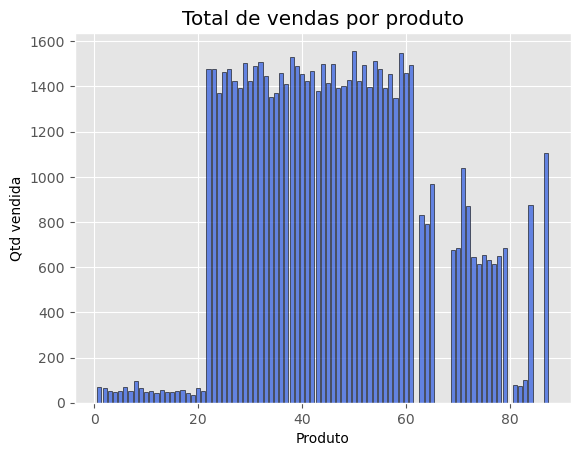

In [39]:
plt.bar(total_pproduto.index, total_pproduto['quantidade'], ec = "k", alpha = .8, color = "royalblue")
plt.style.use('ggplot')

plt.title('Total de vendas por produto')
plt.xlabel('Produto')
plt.ylabel('Qtd vendida')

plt.show()

In [41]:
#Gráfico interativo - Total de vendas por produto 

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly
plotly.offline.init_notebook_mode(connected=True)

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(x=total_pproduto.index, y=total_pproduto['quantidade']))

fig.update_layout(title='Total de vendas por produto', xaxis_title='Produto', yaxis_title='Qtd vendida')

fig.show()

--------------------------

In [20]:
#Visualizando a base de dados de clientes 
cl.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [21]:
#Verificando as informações gerais da tabela de clientes 
cl.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


In [22]:
#Renomeando as colunas 
cl = cl.rename(columns={'customer_id':'id_cliente', 
                        'home_store':'id_loja',
                        'customer_first-name':'primeiro_nome_cliente', 
                        'customer_email':'email_cliente',
                        'customer_since':'cliente_desde', 
                        'loyalty_card_number':'ncartao_fidelidade', 
                        'birthdate':'data_aniversario', 
                        'gender':'genero',
                        'birth_year':'ano_nascimento'})

In [23]:
#Transformando data_aniversario, cliente desde em datetime 
def transforme_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])

transforme_datetime(cl, ['data_aniversario', 'cliente_desde'])

In [24]:
#Verificando se temos dados duplicados na tabela de cl
cl.duplicated().value_counts()

False    2246
dtype: int64

In [25]:
#Verificando o genero dos clientes 
cl.genero.value_counts()

F    977
M    726
N    543
Name: genero, dtype: int64

In [26]:
generos_vazios = cl.loc[cl['genero'] == 'N'] 
print(generos_vazios.head())
print(generos_vazios.shape)

     id_cliente  id_loja primeiro_nome_cliente         email_cliente  \
700         701        3       Donovan Trevino      Miranda@eget.com   
701         702        3        Michael Kinney       Samson@diam.com   
702         703        3         Melvin Valdez  Odette@fermentum.gov   
703         704        3       Bernard Everett    Jelani@egestas.edu   
704         705        3         Phillip Lopez    Paki@consequat.org   

    cliente_desde ncartao_fidelidade data_aniversario genero  ano_nascimento  
700    2017-01-10       127-289-9961       1950-09-30      N            1950  
701    2017-01-18       721-800-7676       1951-04-04      N            1951  
702    2017-01-26       916-386-4370       1951-10-08      N            1951  
703    2017-02-04       711-278-7766       1952-04-11      N            1952  
704    2017-02-12       644-583-4372       1952-10-15      N            1952  
(543, 9)


In [27]:
#Clientes por loja
clientes_por_loja = cl.groupby('id_loja')['id_cliente'].nunique()
clientes_por_loja

id_loja
3    800
5    945
8    501
Name: id_cliente, dtype: int64

In [28]:
#Calculando a idade dos clientes 
hoje = datetime.date.today()
cl['idade'] = (hoje - pd.to_datetime(cl['data_aniversario'], format='%Y-%m-%d').dt.date) // datetime.timedelta(days=365.2425)


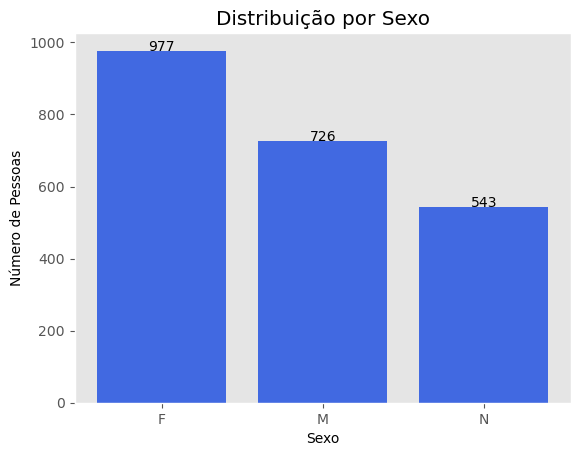

In [35]:
# Agrupa os dados por sexo e conta o número de ocorrências em cada grupo
contagem_sexo = cl.groupby('genero').size()

# Cria o gráfico de barras
plt.bar(contagem_sexo.index, contagem_sexo.values, color='royalblue')
                            
# Adiciona uma legenda com a contagem de cada grupo
for i, valor in enumerate(contagem_sexo):
    plt.text(i, valor, str(valor), ha='center')

# Configura os rótulos dos eixos e o título do gráfico
plt.xlabel('Sexo')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição por Sexo')
plt.grid(False)
# Exibe o gráfico
plt.show()

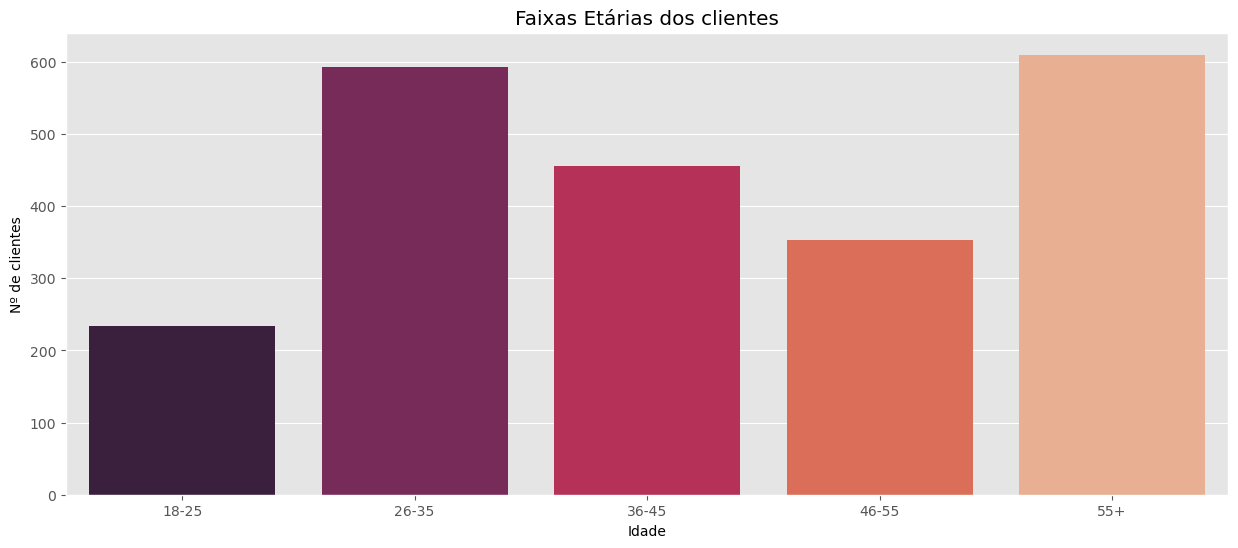

In [31]:
age18_25 = cl.idade[(cl.idade <= 25) & (cl.idade >= 18)]
age26_35 = cl.idade[(cl.idade <= 35) & (cl.idade >= 26)]
age36_45 = cl.idade[(cl.idade <= 45) & (cl.idade >= 36)]
age46_55 = cl.idade[(cl.idade <= 55) & (cl.idade >= 46)]
age55above = cl.idade[cl.idade >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Faixas Etárias dos clientes")
plt.xlabel("Idade")
plt.ylabel("Nº de clientes")
plt.show()